<a href="https://colab.research.google.com/github/sridhar-maddi/Sridhar_INFO5731_FALL2022/blob/main/In_class_exercise_04_11032022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 11/03/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here
!pip install selenium
!pip install beautifulsoup4
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys, time
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
import selenium
#webdriver is our tool to interact with the webpage
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')


import requests #needed to load the page for BS4
from bs4 import BeautifulSoup
import pandas as pd #Using panda to create our dataframe





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.2 MB/s 
     |████████████████████████████████| 384 kB 23.4 MB/s 
     |████████████████████████████████| 140 kB 15.9 MB/s 
     |████████████████████████████████| 58 kB 2.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ub

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.imdb.com/title/tt9376612/reviews")
try:
  co = 4500
  while(co>0):
    wd.find_element_by_id("load-more-trigger").click()
    wd.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    time.sleep(1)
    new_height = wd.execute_script('return document.body.scrollHeight')
    prev_height = new_height
    co-=1
except Exception:
  pass

pg = wd.page_source
soup = BeautifulSoup(pg, "html.parser")

#Get the title of the movie
all = soup.find(id="main")
par = all.find(class_ ="parent")
na = par.find(itemprop = "name")
url = na.find(itemprop = 'url')
fi_title = url.get_text()

#Get the title of the review
tit = [t.get_text().replace("\n", "") for t in all.select(".title")]

#Get the user name of the review
user = [n.find('a').text for n in all.select(".display-name-date .display-name-link")]

#Get the review
revw = [r.get_text() for r in all.select(".content .text")]

#Get the review data
dt = [d.get_text() for d in all.select(".display-name-date .review-date")]

#Make it into dataframe
table_review = pd.DataFrame({
  "UserName": user,
  "Title" : tit,
  "Review" : revw,
  "Date": dt
})

table_review.to_csv('reviews.csv', index=False)
table_review

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


,UserName,Title,Review,Date
0,daisukereds,Sort of disappointed..,I got to admit I wasn't particularly blown awa...,16 September 2021
1,educallejero,Questionable script (and Awkwafina is just th...,The characters are a bit incoherent and straig...,14 September 2021
2,justwen89,"beautiful science fiction, fantasy and action...",Everything comes in it beautiful science ficti...,17 November 2021
3,Sir_AmirSyarif,Marks a bland start to the new phase of Marve...,Destin Daniel Cretton's 'Shang-Chi and the Leg...,24 October 2021
4,Top_Dawg_Critic,This could've been great if it wasn't for the...,The story was riddled with holes and plot issu...,11 November 2021
5,topdog-64841,Surprisingly good,I'll be honest - Marvel movies are not in my t...,28 November 2021
6,planktonrules,A visual feast.,"I am not a big fan of the many, many Marvel fi...",1 December 2021
7,MackMonMay87,A Ringer for a Great MCU Flick,Shang-Chi is one of Marvel Comic's most unknow...,26 November 2021
8,m-ramanan,Worth a watch with family,RATED 8/10\nLanguage: English\nSource: Hotstar...,26 November 2021
9,catalinmarian-13885,So good!!,The best marvel movie after Endgame. The story...,5 December 2021


In [ ]:
import nltk
nltk.download('stopwords')
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 6.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b7e16847b1284c7c3937a203f6692147c3bbc404232c9a6ff4b2b450b52b2c84
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=07eb887bd9791633302fc2335eacd60c45ea1b48d8dc7d421ef69a6321d212d3
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 45.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup
import spacy.cli
spacy.cli.download("en")

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models  
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
dt_wrd = table_review.Review.tolist()
dt_wrd

NameError: ignored

In [ ]:
bigram = gensim.models.Phrases(dt_wrd, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[dt_wrd], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

NameError: ignored

In [ ]:
def rem_stopwrd(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def mk_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def mk_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    out = []
    for s in texts:
        doc = nlp(" ".join(s)) 
        out.append([t.lemma_ for t in doc if t.pos_ in allowed_postags])
    return out

In [ ]:
dt_wrd_nost = rem_stopwrd(dt_wrd)
dt_wrd_bigrams = mk_bigrams(dt_wrd_nost)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
dt_lemm = lemmatization(dt_wrd_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(dt_lemm)

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


[['get', 'admit', 'particularly', 'blow', 'movie', 'even', 'say', 'bored', 'get', 'wrong', 'spectacle', 'action', 'great', 'location', 'nice', 'costume', 'design', 'sound', 'design', 'overall', 'soft', 'release', 'worth', 'see', 'theater', 'specially', 'follow', 'endgame', 'big', 'problem', 'underwritten', 'lead', 'muddle', 'personality', 'reason', 'cover', 'story', 'devoid', 'charm', 'personality', 'good', 'dialogue', 'next', 'issue', 'humor', 'land', 'support', 'normal', 'loud', 'self', 'suppose', 'funny', 'time', 'open', 'mouth', 'role', 'supportive', 'little', 'dramatic', 'question', 'even', 'ultimately', 'matter', 'forgettable', 'character', 'give', 'importance', 'role', 'deserve', 'finally', 'third', 'act', 'weak', 'balancing', 'problem', 'stake', 'feel', 'tension', 'weight', 'action', 'lot', 'superficial', 'end', 'feel', 'safe', 'plot', 'write', 'way', 'appeal', 'consider', 'mandarin', 'portray', 'end', 'appeal', 'specific', 'certainly', 'feel', 'marvel', 'movie', 'bind', 'happe

In [ ]:
id2 = corpora.Dictionary(dt_lemm)
txt = dt_lemm
cor = [id2.doc2bow(t) for t in txt]
print(cor[:1])

NameError: ignored

In [ ]:
[[(id2[i], f) for i, f in c] for c in cor[:1]]

[[('act', 1),
  ('action', 2),
  ('admit', 1),
  ('also', 1),
  ('appeal', 2),
  ('aspect', 1),
  ('balancing', 1),
  ('big', 1),
  ('bind', 1),
  ('blow', 1),
  ('book', 1),
  ('bored', 1),
  ('certainly', 1),
  ('character', 1),
  ('charm', 1),
  ('comic', 1),
  ('consider', 1),
  ('costume', 1),
  ('cover', 1),
  ('deserve', 1),
  ('design', 2),
  ('devoid', 1),
  ('dialogue', 1),
  ('different', 1),
  ('dramatic', 1),
  ('end', 2),
  ('endgame', 1),
  ('even', 2),
  ('feel', 4),
  ('finally', 1),
  ('follow', 1),
  ('forgettable', 1),
  ('funny', 1),
  ('generic', 1),
  ('get', 2),
  ('give', 1),
  ('good', 1),
  ('great', 1),
  ('happen', 1),
  ('humor', 1),
  ('importance', 1),
  ('introduce', 1),
  ('issue', 1),
  ('land', 1),
  ('lead', 1),
  ('little', 1),
  ('location', 1),
  ('lot', 1),
  ('loud', 1),
  ('mandarin', 1),
  ('marvel', 1),
  ('matter', 1),
  ('mouth', 1),
  ('movie', 2),
  ('muddle', 1),
  ('narrative', 1),
  ('next', 1),
  ('nice', 1),
  ('normal', 1),
  ('ope

In [ ]:
lda_mod = gensim.models.ldamodel.LdaModel(corpus=cor,
                                           id2word=id2,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_mod.print_topics())
d_lda = lda_mod[cor]

[(0,
  '0.017*"film" + 0.017*"movie" + 0.017*"fight" + 0.017*"good" + '
  '0.017*"people" + 0.017*"dance" + 0.012*"ring" + 0.012*"story" + '
  '0.012*"start" + 0.012*"see"'),
 (1,
  '0.001*"movie" + 0.001*"people" + 0.001*"see" + 0.001*"high" + 0.001*"dance" '
  '+ 0.001*"honestly" + 0.001*"ring" + 0.001*"time" + 0.001*"marvel" + '
  '0.001*"soak"'),
 (2,
  '0.001*"people" + 0.001*"dance" + 0.001*"good" + 0.001*"movie" + '
  '0.001*"film" + 0.001*"fight" + 0.001*"see" + 0.001*"always" + 0.001*"ring" '
  '+ 0.001*"mcu"'),
 (3,
  '0.001*"feel" + 0.001*"character" + 0.001*"type" + 0.001*"writer" + '
  '0.001*"scene" + 0.001*"get" + 0.001*"also" + 0.001*"even" + 0.001*"see" + '
  '0.001*"great"'),
 (4,
  '0.021*"movie" + 0.019*"marvel" + 0.010*"good" + 0.010*"see" + 0.010*"story" '
  '+ 0.010*"ring" + 0.010*"get" + 0.008*"character" + 0.008*"mcu" + '
  '0.008*"film"'),
 (5,
  '0.001*"year" + 0.001*"ring" + 0.001*"movie" + 0.001*"marvel" + '
  '0.001*"character" + 0.001*"come" + 0.001*"get"

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here


import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt



In [ ]:
lsamodel = LsiModel(cor, 20, id2)
def compute_coh_val(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coh_val = []
    mod_lst = []
    for n in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
        mod_lst.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coh_val.append(coherencemodel.get_coherence())
    return mod_lst, coh_val

In [ ]:
start,stop,step=2,50,6
model_list_lsa, coherence_values_lsa = compute_coh_val(id2, cor,dt_lemm,stop, start, step)
for n, c in zip(range(2, 50, 6), coherence_values_lsa):
  print("Num Topics:", n, " - Coherence Value:", round(c, 5))

Num Topics: 2  - Coherence Value: 0.41762
Num Topics: 8  - Coherence Value: 0.44992
Num Topics: 14  - Coherence Value: 0.45627
Num Topics: 20  - Coherence Value: 0.41762
Num Topics: 26  - Coherence Value: 0.43975
Num Topics: 32  - Coherence Value: 0.45627
Num Topics: 38  - Coherence Value: 0.41762
Num Topics: 44  - Coherence Value: 0.44354


In [ ]:
pprint(lsamodel.print_topics())

[(0,
  '0.385*"movie" + 0.263*"ring" + 0.251*"marvel" + 0.235*"character" + '
  '0.233*"year" + 0.141*"love" + 0.131*"get" + 0.120*"see" + 0.117*"well" + '
  '0.115*"come"'),
 (1,
  '0.225*"year" + -0.182*"marvel" + -0.151*"film" + -0.139*"good" + '
  '0.139*"find" + -0.138*"get" + -0.137*"course" + -0.133*"feature" + '
  '-0.119*"even" + 0.113*"come"'),
 (2,
  '0.420*"movie" + -0.207*"year" + -0.181*"ring" + 0.166*"good" + '
  '0.153*"character" + 0.112*"action" + -0.108*"come" + -0.104*"feature" + '
  '-0.097*"way" + -0.097*"cinematic"'),
 (3,
  '0.295*"become" + 0.207*"way" + 0.188*"wife" + -0.181*"character" + '
  '-0.174*"movie" + 0.165*"action" + 0.147*"give" + 0.133*"art" + 0.131*"ring" '
  '+ 0.127*"martial"'),
 (4,
  '0.479*"movie" + -0.242*"comic_strip" + -0.223*"character" + -0.149*"weapon" '
  '+ -0.143*"comic" + -0.130*"mcu" + -0.129*"film" + -0.115*"fight" + '
  '0.100*"watch" + -0.100*"much"'),
 (5,
  '-0.258*"get" + -0.218*"feel" + -0.168*"story" + -0.156*"plot" + '
  '

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here
nltk.download('all')
!pip install preprocess
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline





[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis
pyLDAvis.enable_notebook()
top = 10
topic_to_topwords = {}
for j, topic in enumerate(table_review.Review.tolist()):
    top1 = np.argsort(topic)[::-1][:top]
    msg = 'Topic %i '  % j
    tp_wrd = [table_review.Review.tolist()[i].strip()[:30] for i in top1]
    msg += ' has top words '.join(tp_wrd)
    print(msg)
    topic_to_topwords[j] = tp_wrd

Topic 0 I got to admit I wasn't partic
Topic 1 I got to admit I wasn't partic
Topic 2 I got to admit I wasn't partic
Topic 3 I got to admit I wasn't partic
Topic 4 I got to admit I wasn't partic
Topic 5 I got to admit I wasn't partic
Topic 6 I got to admit I wasn't partic
Topic 7 I got to admit I wasn't partic
Topic 8 I got to admit I wasn't partic
Topic 9 I got to admit I wasn't partic
Topic 10 I got to admit I wasn't partic
Topic 11 I got to admit I wasn't partic
Topic 12 I got to admit I wasn't partic
Topic 13 I got to admit I wasn't partic
Topic 14 I got to admit I wasn't partic
Topic 15 I got to admit I wasn't partic
Topic 16 I got to admit I wasn't partic
Topic 17 I got to admit I wasn't partic
Topic 18 I got to admit I wasn't partic
Topic 19 I got to admit I wasn't partic
Topic 20 I got to admit I wasn't partic
Topic 21 I got to admit I wasn't partic
Topic 22 I got to admit I wasn't partic
Topic 23 I got to admit I wasn't partic
Topic 24 I got to admit I wasn't partic


<BarContainer object of 40 artists>

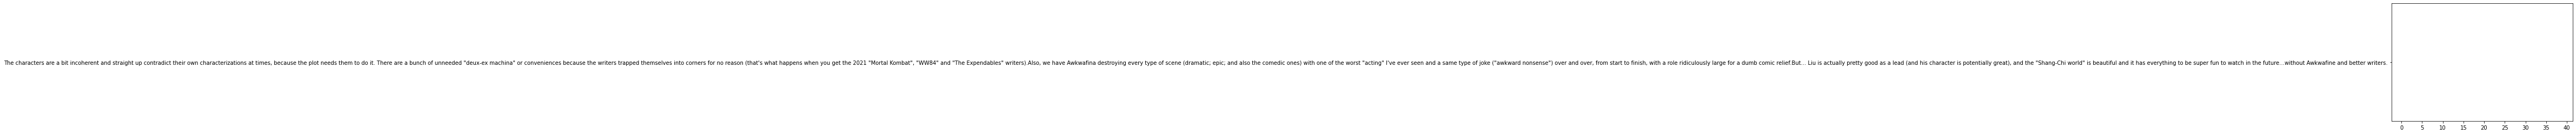

In [ ]:
plt.bar(np.arange(40), table_review.Review.tolist()[1])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code here
!pip install bertopic





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.7 MB/s 
     |████████████████████████████████| 636 kB 26.0 MB/s 
     |████████████████████████████████| 88 kB 7.0 MB/s 
     |████████████████████████████████| 85 kB 4.8 MB/s 
     |████████████████████████████████| 5.2 MB 27.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.5 MB 43.1 MB/s 
     |████████████████████████████████| 1.3 MB 55.2 MB/s 
     |████████████████████████████████| 163 kB 57.0 MB/s 
     |████████████████████████████████| 7.6 MB 34.1 MB/s 
     |████████████████████████████████| 1.1 MB 55.5 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340745 sha256=a2595e7b2ac97348bb632141b2d448d79bde2271ea12fec52116dcb7beedd539
  Stored in directory: /root/.cache

In [ ]:
from bertopic import BERTopic
top_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = top_model.fit_transform(table_review.Review.tolist())

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2022-11-05 22:38:11,775 - BERTopic - Transformed documents to Embeddings
2022-11-05 22:38:20,950 - BERTopic - Reduced dimensionality
2022-11-05 22:38:20,985 - BERTopic - Clustered reduced embeddings


In [ ]:
freq = top_model.get_topic_info(); freq.head(10)

,Topic,Count,Name
0,-1,25,-1_the_and_of_to


In [ ]:
top_model.get_topic(-1)

[('the', 0.16951858085182012),
 ('and', 0.10638911118601696),
 ('of', 0.09707450519980565),
 ('to', 0.09368219415131758),
 ('is', 0.07763367005003612),
 ('in', 0.06000191107718017),
 ('with', 0.05580982339945748),
 ('as', 0.050765786971647874),
 ('that', 0.0500305993157706),
 ('it', 0.04929155104992892)]

In [ ]:
top_model.visualize_term_rank()

In [ ]:
top_model.update_topics(table_review.Review.tolist(), topics, n_gram_range=(1, 2))

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)
Topic modeling can be assessed using the idea of Topic Coherence, because topic models can not guarantee that their output is interpretable
 Topic modeling allows us to cut through the noise (deal with text data's high dimensionality) and identify the signal (the major subjects) in our data.
There are different techniques of Topic Modelling : The most widely used among them are Latent Semantic Analysis(LSA) and Latent Dirichlet Allocation (LDA) .
LDA, or Latent Dirichlet Allocation, is the best and most often used approach for defining and working with Topic Modeling. It extracts topic probabilities from statistical data.
Latent Semantic Analysis :
The LSA employs the Bag of Words (BoW) model, which is supported by findings in a term-document matrix (occurrence of terms in a document). 
Singular value decomposition is used by LSA to discover latent themes by performing a matrix decomposition on the document-term matrix. 
The Topic coherence measure, which provides a realistic measure for identifying the number of topics, is the best technique to analyze 
and interpret k (number of topics) in topic modeling. The average/median of pairwise word comparable scores of the words in a topic is used in the computation. 
The topic coherence score model has a high value. The plot of coherence value vs. number of subjects illustrates that as the number of topics increases, 
the coherence score drops. The highest coherence score is determined by 14 topics, and the coherence value obtained for the data using the LDA algorithm is 0.25.

Latent Dirichlet Allocation :

To extract topics from textual input, LDA is a frequently used topic modeling technique. 
Topic models learn topics—typically expressed as groups of important words—automatically and unsupervisedly from unlabeled documents. 
Subjects are not guaranteed to be well interpretable, hence coherence criteria have been developed to discern between good and bad topics. 
We built the necessary dictionaries and corpora for Topic Modeling: The dictionary and the corpus are the two basic inputs to the LDA topic model. 
Each word in the manuscript is assigned a unique id by Gensim. We must also give the number of subjects in addition to the corpus and dictionary. 
LDA is an unsupervised approach, which means we don't know how many topics are in our corpus before we run the model. By experimenting with a small number of topics and 
comparing the results, we may use the LDA visualization tool pyLDAvis. One of the most used ways for estimating the number of subjects is topic coherence. 
We must create a number of LDA models with different numbers of topics (k) and choose the one with the highest coherence value. The plot of coherence value vs 
number of topics demonstrates that as the number of topics increases, the coherence score declines, with a decline of 30. Because subjects with a coherence score of 
about 30 have strong coherence scores but may have repetitive keywords in the topic, the number of topics chosen is still dependent on the necessity. 
Hence the data using the LDA technique has an observation coherence score of 0.58.

BerTopic:

BerTopic is a topic modeling technique that uses transformers (BERT embeddings) and class-based TF-IDF to create dense clusters. 
It also allows you to easily interpret and visualize the topics generated.

So, based on the aforementioned analysis, I can conclude that LDA (Latent Dirichlet Allocation) produces better outcomes with an optimum topic of 30. 
But probabliy BerTopic might be a better one due to the fact that its a latest model with more words in dictonary than any other model.



